<h1> Logistic Regression (Classification)</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> Data Analysis </h1>

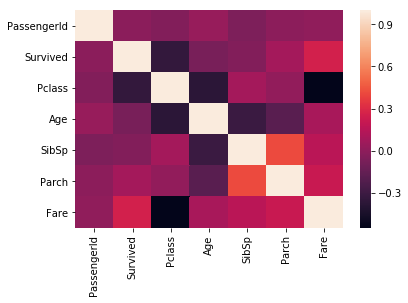

In [4]:
sns.heatmap(train.corr())

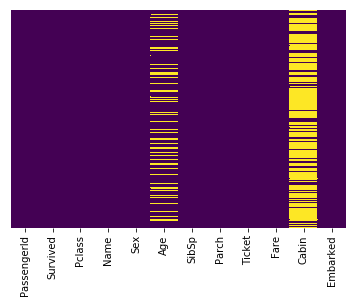

In [5]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

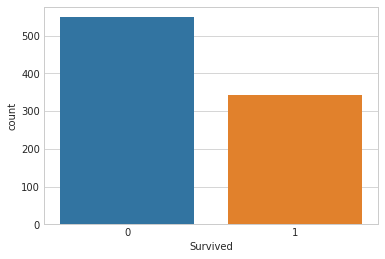

In [9]:
sns.countplot(x='Survived', data=train)

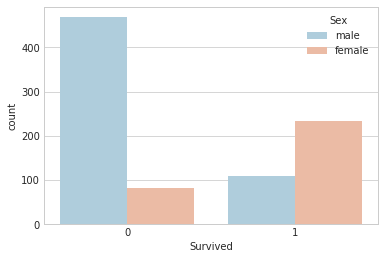

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

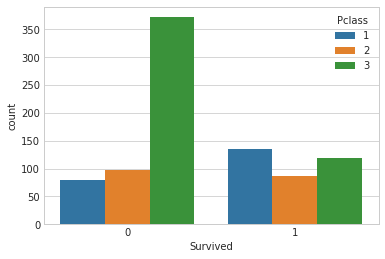

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train)

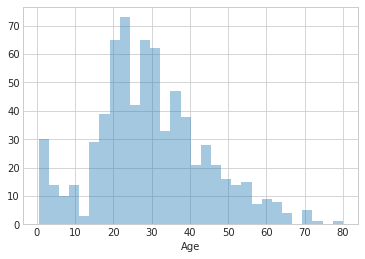

In [14]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30)

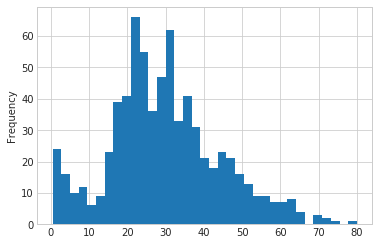

In [16]:
train['Age'].plot.hist(bins=35)

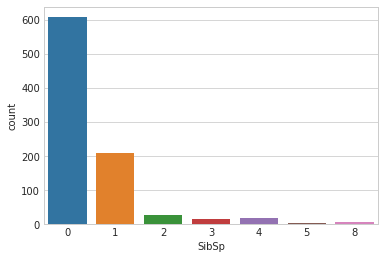

In [17]:
sns.countplot(x='SibSp', data=train)

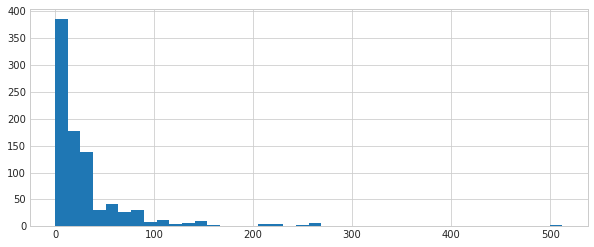

In [20]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [23]:
#import cufflinks as cf
#cf.go_offline()
#train['Fare'].iplot(kind='hist', bins=50)

ModuleNotFoundError: No module named 'cufflinks'

<h1> Data Preparation </h1>

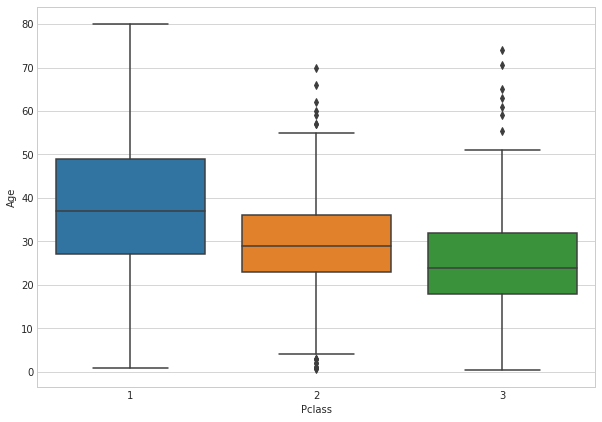

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y = 'Age', data=train)

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [31]:
train.drop('Cabin', axis=1, inplace=True)

In [32]:
train.dropna(inplace=True)

In [37]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
pd.concat([train, sex, embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<h1> Classification </h1>

In [42]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

<h2> Evaluation </h2>

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.72      0.88      0.79       163
          1       0.71      0.45      0.55       104

avg / total       0.71      0.72      0.70       267

